## Wine Quality Grading:
### Predict if wine is "Good" or "Below_Average" based on its physicochemical properties.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

### Import data

In [2]:
# check the current working directory
import os
print(os.getcwd())

C:\Users\udeni\Desktop\WineQuality


In [3]:
# Change directory
os.chdir(r'C:\Users\Udeni\Desktop\WineQuality')

# Verify
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Udeni\Desktop\WineQuality


In [4]:
df = pd.read_csv("winequality.csv")

### Data exploration

In [5]:
# First, check the attributes of the dataset
df.shape

(1999, 12)

In [6]:
# Check the first ten rows of the data in the dataset
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.30,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.20,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
5,7.10,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5


In [7]:
# Check the data type for each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1999 non-null   float64
 1   volatile acidity      1999 non-null   float64
 2   citric acid           1999 non-null   float64
 3   residual sugar        1999 non-null   float64
 4   chlorides             1999 non-null   float64
 5   free sulfur dioxide   1999 non-null   float64
 6   total sulfur dioxide  1999 non-null   float64
 7   density               1999 non-null   float64
 8   pH                    1999 non-null   float64
 9   sulphates             1999 non-null   float64
 10  alcohol               1999 non-null   float64
 11  quality               1999 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 187.5 KB


In [8]:
# Check the statistics of the variables
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00
mean,8.67,0.54,0.25,3.70,0.08,20.19,52.62,1.00,3.29,0.95,10.67,5.64
std,2.24,0.18,0.18,3.29,0.05,15.64,37.05,0.00,0.27,0.78,1.37,1.26
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.34,0.33,8.40,2.00
25%,7.10,0.40,0.11,2.00,0.06,9.00,24.00,1.00,3.18,0.56,9.50,5.00
50%,8.00,0.53,0.20,2.30,0.07,16.00,42.00,1.00,3.30,0.65,10.40,6.00
75%,9.90,0.66,0.39,3.46,0.09,27.00,73.00,1.00,3.42,0.84,11.40,6.00
max,15.90,1.58,1.00,15.99,0.61,72.00,289.00,1.00,4.16,3.99,15.00,9.00


In [9]:
# Check the total missing values in each column
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check the value count of the variable "quality".
df['quality'].value_counts()

quality
5    735
6    678
7    265
4     98
3     60
9     60
8     59
2     44
Name: count, dtype: int64

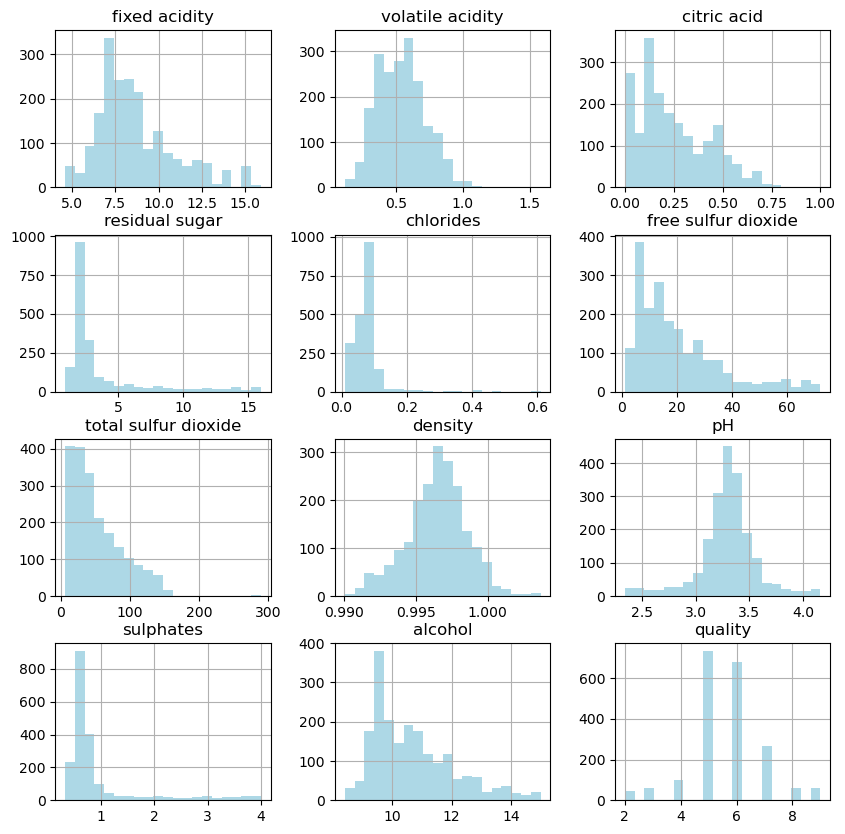

In [11]:
# Use histograms of each variable to visualise the distribution of each attribute.
df.hist(bins=20,figsize=(10, 10), color = 'lightblue')
plt.show()


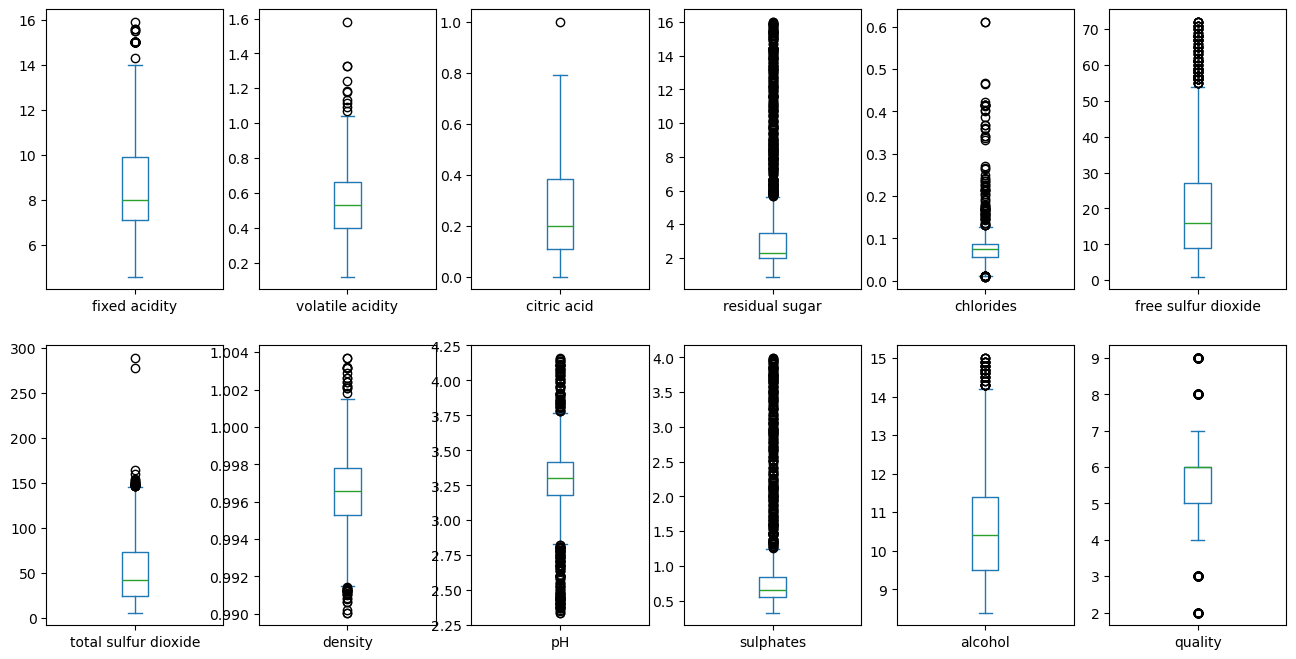

In [12]:
# Use box plots of each variable to visualise the distribution of each attribute.
df.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey= False, figsize=(16,8))
plt.show()


##### Check the correlation between varibles

In [13]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix.round(2) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.11,0.37,0.25,-0.10,0.08,0.02,0.29,-0.27,0.28,0.07,0.04
volatile acidity,-0.11,1.00,-0.51,0.08,-0.03,0.08,0.11,-0.04,0.07,0.07,-0.06,-0.17
citric acid,0.37,-0.51,1.00,-0.14,0.30,-0.18,-0.06,0.35,-0.22,-0.14,-0.02,0.12
residual sugar,0.25,0.08,-0.14,1.00,-0.32,0.43,0.30,-0.08,-0.12,0.52,0.28,-0.01
chlorides,-0.10,-0.03,0.30,-0.32,1.00,-0.26,-0.13,0.26,-0.04,-0.29,-0.30,-0.05
free sulfur dioxide,0.08,0.08,-0.18,0.43,-0.26,1.00,0.53,-0.14,-0.10,0.39,0.17,-0.01
total sulfur dioxide,0.02,0.11,-0.06,0.30,-0.13,0.53,1.00,-0.06,-0.06,0.25,0.01,-0.05
density,0.29,-0.04,0.35,-0.08,0.26,-0.14,-0.06,1.00,-0.08,-0.15,-0.37,-0.09
pH,-0.27,0.07,-0.22,-0.12,-0.04,-0.10,-0.06,-0.08,1.00,-0.13,-0.02,0.00
sulphates,0.28,0.07,-0.14,0.52,-0.29,0.39,0.25,-0.15,-0.13,1.00,0.29,0.01


##### Plot the correlation Heatmap

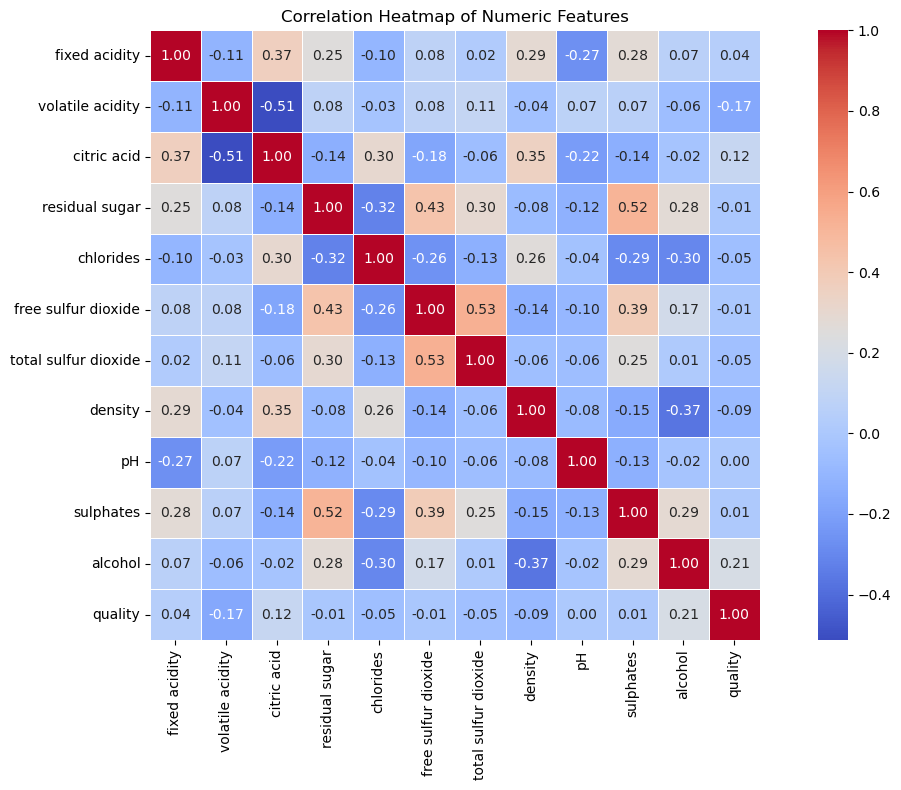

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


##### The varibles are not strong correlation with wine quality

### Data preparation

#### Suppose the wines with qualily >=5.5 are Good 
##### then binarise the quality 

In [7]:
df=df.copy()

In [8]:
df['quality_label'] = df['quality'].apply(lambda x: 'Good' if x >= 5.5 else 'Below_Average')

In [17]:
# Check the class distribution
print(df['quality_label'].value_counts())

quality_label
Good             1062
Below_Average     937
Name: count, dtype: int64


In [10]:
# Get the integer class label for the 'quality' variable.
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
# Bad becomes 0 and Good becomes 1
df['quality_label'] = label_quality.fit_transform(df['quality_label'])
df['quality_label'].value_counts()

quality_label
1    1062
0     937
Name: count, dtype: int64

In [19]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.30,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,1
4,7.20,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
5,7.10,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,0
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5,0
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7,1
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7,1
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,0


#### I am going to use supportVector Machines (SVM), Logistic Regression and Decision Tree/Random Forest models to classfy the wine.
#### SVM and Logistic Regression are sensitive to skewness of the varibles.  

##### Normalise the distributions using Power Transformation.

In [11]:
df1= df.copy()

In [12]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
# Apply PowerTransformer (Yeo-Johnson) to skewed variables
transformer = PowerTransformer(method='yeo-johnson')

# List of skewed variables to transform
skewed_cols = ['citric acid', 'residual sugar', 'chlorides',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

# Add transformed columns to df1
for col in skewed_cols:
    df1[f'{col}_trans'] = transformer.fit_transform(df1[[col]])
# Create the transformed dataframe
transdf = df1.drop((skewed_cols), axis =1)
transdf.head(10)


,fixed acidity,volatile acidity,density,pH,alcohol,quality,quality_label,citric acid_trans,residual sugar_trans,chlorides_trans,free sulfur dioxide_trans,total sulfur dioxide_trans,sulphates_trans
0,7.30,0.70,1.00,3.51,9.40,5,0,-1.68,-0.76,0.22,-0.44,-0.29,-0.71
1,7.80,0.88,1.00,3.20,9.80,5,0,-1.68,0.08,0.80,0.63,0.65,-0.07
2,7.80,0.76,1.00,3.26,9.80,5,0,-1.30,-0.22,0.65,-0.04,0.34,-0.21
3,11.20,0.28,1.00,3.16,9.80,6,1,1.54,-0.76,0.19,0.12,0.49,-0.59
4,7.20,0.70,1.00,3.51,9.40,5,0,-1.68,-0.76,0.22,-0.44,-0.29,-0.71
5,7.10,0.66,1.00,3.51,9.40,5,0,-1.68,-0.93,0.19,-0.23,-0.07,-0.71
6,7.90,0.60,1.00,3.30,9.40,5,0,-1.13,-1.31,0.01,-0.04,0.47,-1.46
7,7.30,0.65,0.99,3.39,10.00,7,1,-1.68,-2.37,-0.12,-0.04,-0.90,-1.37
8,7.80,0.58,1.00,3.36,9.50,7,1,-1.49,-0.61,0.13,-0.68,-1.09,-0.65
9,7.50,0.50,1.00,3.35,10.50,5,0,0.76,1.40,0.07,0.12,1.26,0.40


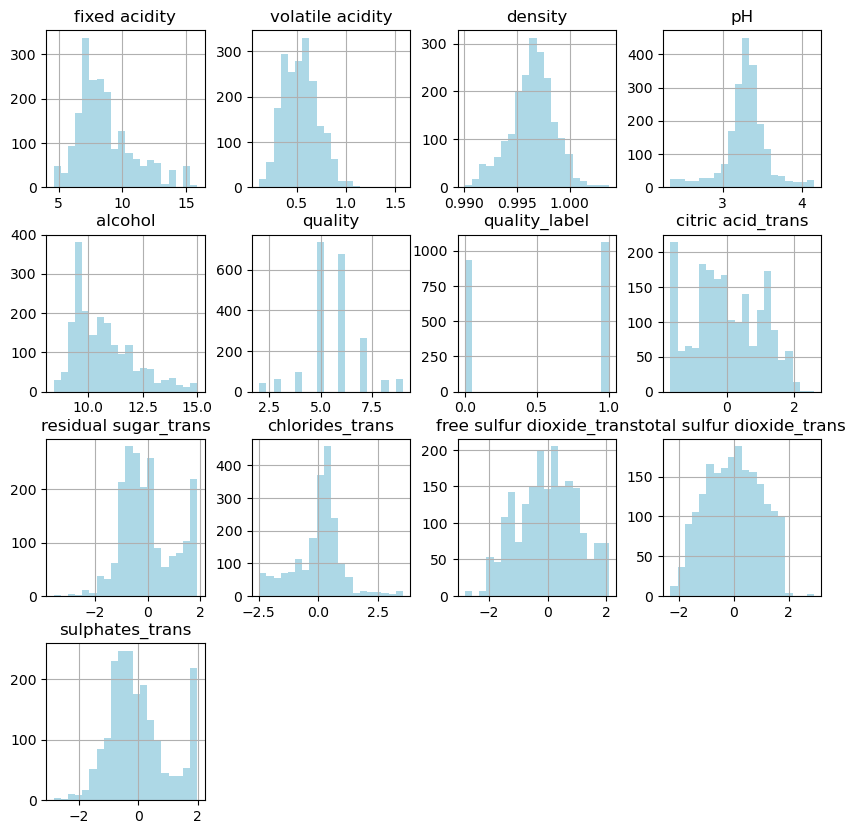

In [22]:
# Use histograms of each variable to visualise the distribution of each attribute in transformed dataframe.
transdf.hist(bins=20,figsize=(10, 10), color = 'lightblue')
plt.show()

In [20]:
# Features labelling for the modelling
# Exclude free sulfur dioxide variable, which is represented in the total free sulfur dioxide variable.  
X = transdf.drop(['quality', 'quality_label', 'free sulfur dioxide_trans'], axis = 1)
y = transdf['quality_label']

In [21]:
# Split the data into training and testing sets.
# 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

#### Train Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Support Vector Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


#### Evaluate all models

In [23]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Results:")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

# Evaluate each model
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_tree, "Decision Tree")



Logistic Regression Results:
[[413 238]
 [243 506]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       651
           1       0.68      0.68      0.68       749

    accuracy                           0.66      1400
   macro avg       0.65      0.65      0.65      1400
weighted avg       0.66      0.66      0.66      1400


SVM Results:
[[419 232]
 [230 519]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       651
           1       0.69      0.69      0.69       749

    accuracy                           0.67      1400
   macro avg       0.67      0.67      0.67      1400
weighted avg       0.67      0.67      0.67      1400


Decision Tree Results:
[[450 201]
 [279 470]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       651
           1       0.70      0.63      0.66       749

    accuracy                           0.66  

#### Use k-fold cross validation

#####  Evaluate model's performance more reliably by splitting data into multiple training/testing folds rather than just one. 
##### The most common method is k-fold cross-validation, using cross_val_score from sklearn.

In [24]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)
print("Logistic Regression CV Accuracy:", log_scores.mean())

# SVM
svm_scores = cross_val_score(SVC(), X, y, cv=5)
print("SVM CV Accuracy:", svm_scores.mean())

# Decision Tree
tree_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print("Decision Tree CV Accuracy:", tree_scores.mean())


Logistic Regression CV Accuracy: 0.6692581453634087
SVM CV Accuracy: 0.6787644110275689
Decision Tree CV Accuracy: 0.6092518796992481



#### **Conclusion**

In this project, I built three classification models: Logistic Regression, Support Vector Machine (SVM), and Decision Tree to predict wine quality based on chemical and physical characteristics.

After evaluating the models using cross-validation, the following accuracies were observed:

- Logistic Regression CV Accuracy: **0.67**
- SVM CV Accuracy: **0.68**
- Decision Tree CV Accuracy: **0.61**

The Support Vector Machine (SVM) model achieved the highest cross-validation accuracy, indicating it captured the underlying patterns slightly better than the others. Logistic Regression also performed reasonably well, suggesting that a linear decision boundary is somewhat effective. The Decision Tree model lagged, possibly due to overfitting or sensitivity to data splits.

Due to limited computing resources and time constraints, hyperparameter tuning was not performed. All models were trained using default settings to ensure feasibility on available hardware.

Overall, the models provided meaningful predictive power. For future work, tuning hyperparameters and experimenting with ensemble techniques such as Random Forest or XGBoost could further improve performance.
